<h2  align="center"> Machine Learning With Python: Linear Regression Multiple Variables</h2>

<h3>Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below is the table containing home prices in monroe twp, NJ. Here price depends on **area (square feet), bed rooms and age of the home (in years)**. Given these prices we have to predict prices of new homes based on area, bed rooms and age.

<img src="photo/homeprices2.jpg" style='height:200px;width:350px'>

Given these home prices find out price of a home that has,

**3000 sqr ft area, 3 bedrooms, 40 year old**

**2500 sqr ft area, 4 bedrooms,  5 year old**

We will use regression with multiple variables here. Price can be calculated using following equation,

<img src="photo/equation2.jpg" >

Here area, bedrooms, age are called independant variables or **features** whereas price is a dependant variable

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\AI\Machine learning\dataset\homeprices.csv')
data.head()

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


**Data Preprocessing: Fill NA values with median value of a column**

In [3]:
data.bedrooms.median()

4.0

In [4]:
data.bedrooms.fillna(data.bedrooms.median(),inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   area      6 non-null      int64  
 1   bedrooms  6 non-null      float64
 2   age       6 non-null      int64  
 3   price     6 non-null      int64  
dtypes: float64(1), int64(3)
memory usage: 324.0 bytes


In [6]:
x=data.drop('price',axis=1)
y=data.price

In [7]:
x

,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [8]:
y

0    550000
1    565000
2    610000
3    595000
4    760000
5    810000
Name: price, dtype: int64

<Axes: >

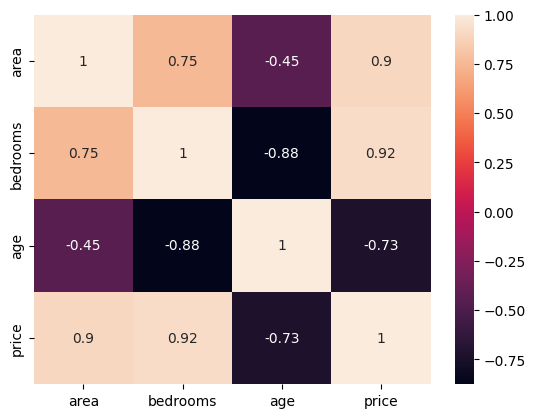

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
model=LinearRegression()

In [12]:
model.fit(x,y)

LinearRegression()

In [17]:
prediction=model.predict(x)
prediction

array([518217.63297611, 602590.07937407, 615307.4140366 , 597962.89583192,
       760663.42675457, 795258.55102673])

In [14]:
y.values

array([550000, 565000, 610000, 595000, 760000, 810000], dtype=int64)

In [15]:
model.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [16]:
model.intercept_

221323.0018654043

In [18]:
abs(y-prediction)

0    31782.367024
1    37590.079374
2     5307.414037
3     2962.895832
4      663.426755
5    14741.448973
Name: price, dtype: float64

In [19]:
mean_absolute_error(y,prediction)

15507.93866572013